In [16]:
# DIANNA AGUSTINA S.
# NIM. 1202912003
# S1 KK SISTEM INFORMASI

# UAS BIG DATA

#2 PCA & MLR

Melakukan import library yang akan digunakan pada pemodelan. Setelah melakukan import library, kemudian load dataset yang akan digunakan.

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../input/pcamlrdiannadata/UAS_PCA dan Multi Linear Regression.csv')
data.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,48456121,3,45149155,22079895,856297,0,4379499411,1,1,1,0
1,1234561810,53,34870604,3,3884779,0,599572,17479146,5590710218,1,0,1,1
2,1234561778,52,19423557,2,19406530,0,2743516,0,5062479210,1,0,1,0
3,1234561915,40,47042967,4,16639872,18639840,4534694,18489681,793484760,1,1,1,1
4,1234561363,55,41072996,2,19249501,0,0,11176695,5104873527,1,0,0,1


Melakukan pengecekan jumlah baris dan jumlah kolom yang terdapat dalam dataset.

In [18]:
data.shape

(999, 13)

Pengecekan terhadap tipe data pada setiap kolom yang terdapat dalam dataset.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer ID            999 non-null    int64
 1   Umur                   999 non-null    int64
 2   Income                 999 non-null    int64
 3   Product_holding        999 non-null    int64
 4   Saving                 999 non-null    int64
 5   Deposit                999 non-null    int64
 6   KK                     999 non-null    int64
 7   Tab Bisnis             999 non-null    int64
 8   Limit Kredit Mortgage  999 non-null    int64
 9   Unnamed: 9             999 non-null    int64
 10  Unnamed: 10            999 non-null    int64
 11  Unnamed: 11            999 non-null    int64
 12  Unnamed: 12            999 non-null    int64
dtypes: int64(13)
memory usage: 101.6 KB


Melakukan pengecekan nilai null terhadap dataset. 

In [20]:
data.isnull().sum()

Customer ID              0
Umur                     0
Income                   0
Product_holding          0
Saving                   0
Deposit                  0
KK                       0
Tab Bisnis               0
Limit Kredit Mortgage    0
Unnamed: 9               0
Unnamed: 10              0
Unnamed: 11              0
Unnamed: 12              0
dtype: int64

Mengecek deskripsi data dari dataset.

In [21]:
data.describe()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,999.0,999.000000,999.000000,999.000000
mean,1.234561e+09,37.845846,3.024629e+07,2.511512,2.519381e+07,8.102379e+06,1.375051e+06,7.680451e+06,3.240374e+09,1.0,0.496496,0.502503,0.512513
std,2.887941e+02,10.427258,1.148920e+07,0.859707,1.416718e+07,1.010176e+07,1.646219e+06,7.765851e+06,1.644585e+09,0.0,0.500238,0.500244,0.500094
min,1.234561e+09,20.000000,1.006109e+07,1.000000,5.233880e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.078308e+08,1.0,0.000000,0.000000,0.000000
25%,1.234561e+09,29.000000,2.002493e+07,2.000000,1.325730e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.826172e+09,1.0,0.000000,0.000000,0.000000
50%,1.234561e+09,38.000000,3.010337e+07,3.000000,2.459173e+07,0.000000e+00,5.343450e+05,1.022446e+07,3.288791e+09,1.0,0.000000,1.000000,1.000000
75%,1.234562e+09,47.000000,3.992664e+07,3.000000,3.709618e+07,1.670369e+07,2.670998e+06,1.507788e+07,4.691794e+09,1.0,1.000000,1.000000,1.000000
max,1.234562e+09,55.000000,4.998642e+07,4.000000,4.993103e+07,2.998612e+07,4.979749e+06,1.996948e+07,5.994234e+09,1.0,1.000000,1.000000,1.000000


Split data menjadi data training dan data testing dengan komposisi data training 70% dan data testing 30%. 
Kemudian normalisasi data training dengan menggunakan fungsi StandardScaler().

In [22]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=0)

sc = StandardScaler()
process_ = sc.fit_transform(data_train)

data_process = pd.DataFrame(process_, columns=data_train.columns)
data_process.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,-1.361136,1.675461,0.936041,1.752538,0.599066,-0.184212,0.362187,0.920396,1.266227,0.0,1.004301,1.012960,0.967620
1,1.158007,1.484425,-1.486010,0.578018,0.378159,-0.802461,1.033043,1.481648,0.367016,0.0,-0.995717,1.012960,0.967620
2,0.974859,0.815798,1.281189,-0.596501,0.996309,-0.802461,-0.228599,-0.996360,-1.598645,0.0,-0.995717,1.012960,-1.033464
3,0.612020,-0.139383,1.226466,-0.596501,-0.560713,-0.802461,-0.822714,0.651534,1.356989,0.0,-0.995717,-0.987206,0.967620
4,0.314837,1.388907,0.876850,1.752538,-0.992647,1.348833,0.664937,0.956582,-0.855015,0.0,1.004301,1.012960,0.967620


Proses data training menggunakan fungsi PCA(), kemudian visualisasikan hasil data menggunakan scatter plot.

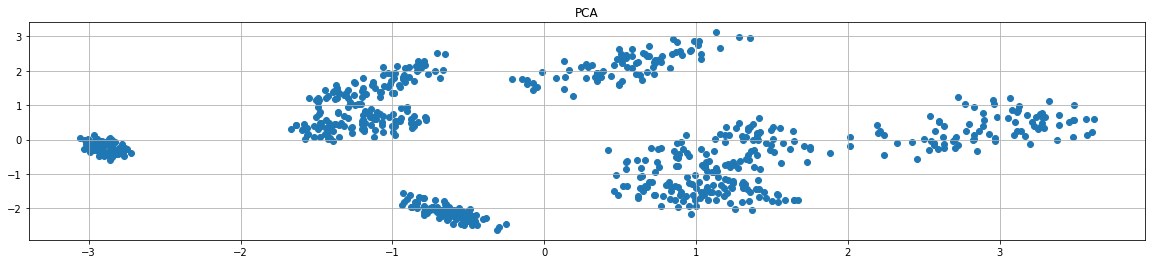

In [23]:
fig = plt.figure(figsize = (20,4) )

#x_train = x_train.fillna(0)
pca = PCA()
pca_ = pca.fit_transform(data_process)

plt.scatter(pca_[:,0],pca_[:,1] ) #  , c = y  )
plt.title('PCA')
plt.grid()
plt.show()

Dari hasil perhitungan PCA() dapat dilihat bahwa data tersegmen menjadi 6 bagian. Format data hasil perhitungan PCA menjadi DataFrame.

In [25]:
data_pca = pd.DataFrame(pca_, columns=data_process.columns)
data_pca.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2.565764,-0.112486,-0.337936,-0.694810,-0.851071,-1.577982,1.501305,-0.780742,1.128776,0.074602,-0.050884,-7.652019e-16,3.693901e-17
1,1.401283,-0.461778,-1.966048,-0.432881,0.678872,-1.649812,-0.577199,1.805416,-0.268882,-0.072361,-0.377135,2.614488e-16,8.952840e-18
2,-1.546365,1.202412,-0.879855,2.011777,-1.150519,-0.717141,0.219722,0.840276,0.263139,0.781187,-0.075507,3.237313e-16,5.514139e-18
3,-0.691369,-2.273963,-0.736714,0.248171,-0.185239,-0.694674,-0.634503,-1.348458,-0.082920,-0.031577,0.241940,5.594181e-15,-6.668181e-17
4,2.888821,0.389879,0.512235,0.092824,-1.982926,-0.467871,-0.707350,0.413308,-0.210412,0.312489,0.009571,-2.831751e-16,-9.251691e-18


Untuk melakukan proses multi linear regression, tentukan dependen dan independen variabel pada data training dan data testing. Varibel dependen yang digunakan adalah kolom "Limit Kredit Mortgage", sementara variabel independen adalah kolom lain selain kolom yang dijadikan variabel dependen.

In [28]:
x_train = data_pca.drop(columns=['Limit Kredit Mortgage'])
y_train = data_pca['Limit Kredit Mortgage']

x_test = data_test.drop(columns=['Limit Kredit Mortgage'])
y_test = data_test['Limit Kredit Mortgage']

x_train.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2.565764,-0.112486,-0.337936,-0.694810,-0.851071,-1.577982,1.501305,-0.780742,0.074602,-0.050884,-7.652019e-16,3.693901e-17
1,1.401283,-0.461778,-1.966048,-0.432881,0.678872,-1.649812,-0.577199,1.805416,-0.072361,-0.377135,2.614488e-16,8.952840e-18
2,-1.546365,1.202412,-0.879855,2.011777,-1.150519,-0.717141,0.219722,0.840276,0.781187,-0.075507,3.237313e-16,5.514139e-18
3,-0.691369,-2.273963,-0.736714,0.248171,-0.185239,-0.694674,-0.634503,-1.348458,-0.031577,0.241940,5.594181e-15,-6.668181e-17
4,2.888821,0.389879,0.512235,0.092824,-1.982926,-0.467871,-0.707350,0.413308,0.312489,0.009571,-2.831751e-16,-9.251691e-18


Buat pemodelan menggunakan fungsi LinearRegression() terhadap data training. Dari hasil pemodelan ini dapat diketahui nilai koefisien (coef_), nilai intercept (intercept_), dan nilai akurasi (score).

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(lin_reg.coef_)

[ 3.48560184e-17 -9.62843452e-17 -1.83908199e-17 -9.16806066e-17
  1.13984603e-17  7.40434739e-17 -5.15095239e-17  7.02153360e-17
 -8.44703322e-16 -3.65374741e-16 -1.46598426e-42 -2.54965377e-44]


In [30]:
lin_reg.intercept_

2.0330264256369153e-17

In [31]:
lin_reg.score(x_test, y_test)

-4.059361363639279

Melakukan prediksi terhadap data testing terhadap pemodelan yang telah dibuat.

In [33]:
y_predict = lin_reg.predict(x_test)

Hasil prediksi ditampilkan bersama dengan data testing secara keseluruhan.

In [34]:
data_output = data_test.drop(columns=['Limit Kredit Mortgage'])

data_output = data_output.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'])
data_output['Prediksi'] = y_predict
data_output

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Prediksi
722,1234561414,44,18733146,4,29410554,16852937,3191809,14999343,4.515923e-08
77,1234561958,27,20308634,1,45997637,0,0,0,4.318272e-08
877,1234561714,26,27176988,2,31596980,0,850104,0,4.284846e-08
613,1234561047,21,17778619,2,2547156,0,2284981,0,4.261625e-08
903,1234561506,49,38930485,1,17640774,0,0,0,4.251701e-08
...,...,...,...,...,...,...,...,...,...
695,1234561915,24,29288527,1,40991825,0,0,0,4.296051e-08
10,1234561169,43,33863309,3,1226221,0,870942,11825330,4.320854e-08
105,1234561459,41,19105223,3,28496648,0,2851808,14413203,4.387048e-08
68,1234561720,55,34127453,3,47867908,13862040,0,19594290,4.535210e-08
